# Final Project - Heart Disease ML
## PYTN-PKJ-02-037 / Pebrianto

## Import needed libraries

In [1]:
import pandas as pd # to read csv
from sklearn.model_selection import train_test_split # to split data
from sklearn.metrics import confusion_matrix, accuracy_score # for model evaluation
from sklearn.metrics import mean_squared_error # to calculate mse
from sklearn.metrics import mean_absolute_error # to calculate mae
from sklearn.metrics import r2_score # to calculate r2
import numpy as np # needed for some operation
from scipy import stats # for Z-Score
import matplotlib.pyplot as plt # to display graph
%matplotlib inline
import seaborn as sns # for correlation visualization
sns.set(color_codes=True)
from sklearn.preprocessing import StandardScaler # scale data
# several ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier as RF

## Preprocessing

In [2]:
# import data
dt = pd.read_csv("heart.csv")
dt = pd.DataFrame(dt)
dt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
dt.info() # there is no null entry or non numerical value; no need to handle null and encode

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# removing outliers using Z-score
z = np.abs(stats.zscore(dt))
dt = dt[(z<3).all(axis=1)]
dt.shape

(287, 14)

Text(0.5, 1.0, 'Pearson Correlation')

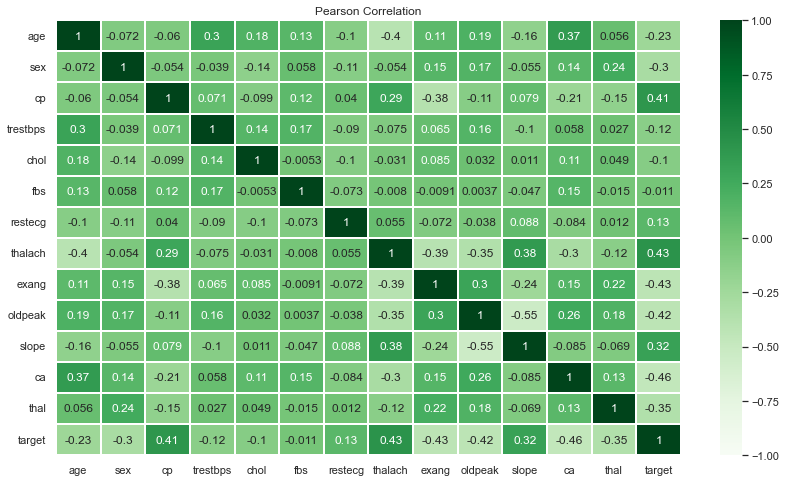

In [5]:
# finding the correlation between variables using Pearson's Correlation
fig = plt.subplots(figsize = (14,8))
sns.heatmap(dt.corr(method = 'pearson'), vmin = -1,vmax = 1, cmap = "Greens", annot = True, linewidth = 0.1)
plt.title("Pearson Correlation")

In [6]:
# split into 70% train and 30% test data
x_train, x_test, y_train, y_test = \
train_test_split(dt.drop(['target'], axis=1), dt['target'], test_size = .3, random_state = 10) 

# scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Built Models

In [7]:
# built ML models using several algorithms
models = [
    LogisticRegression(random_state = 0),
    KNeighborsClassifier(n_neighbors = 5, p = 2, metric = 'minkowski'),
    SVC(kernel = 'linear', random_state = 0),
    DT(criterion = 'entropy', random_state = 0),
    RF(n_estimators = 10, criterion = 'entropy', random_state = 0),
    GaussianNB(),
]

## Train and Evaluate Models

In [8]:
# train models and evaluate accuracy
for model in models:
    model.fit(x_train, y_train) 
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print(type(model).__name__ + " : accuracy = " + str(accuracy))

LogisticRegression : accuracy = 0.8160919540229885
KNeighborsClassifier : accuracy = 0.7931034482758621
SVC : accuracy = 0.8275862068965517
DecisionTreeClassifier : accuracy = 0.7816091954022989
RandomForestClassifier : accuracy = 0.8160919540229885
GaussianNB : accuracy = 0.8160919540229885


## More into SVM

In [9]:
# SVM model
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

In [10]:
# SVM evaluation
mse = mean_squared_error(y_test,y_pred)
r = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)

print("Accuracy = ", accuracy, " -> correctly classified data instances over the total number of data instances")
print("Mean Squared Error = ", mse, " -> average of the squared difference between the original and predicted values")
print("R Score = ", r, " -> amount of the variation in the output dependent attribute ")
print("Mean Absolute Error = ", mae, " -> average of the absolute difference between the actual and predicted values")

Accuracy =  0.8275862068965517  -> correctly classified data instances over the total number of data instances
Mean Squared Error =  0.1724137931034483  -> average of the squared difference between the original and predicted values
R Score =  0.30805938494167573  -> amount of the variation in the output dependent attribute 
Mean Absolute Error =  0.1724137931034483  -> average of the absolute difference between the actual and predicted values


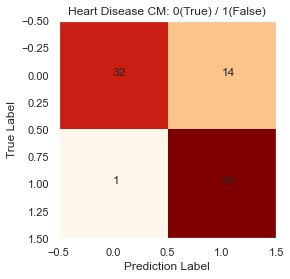

In [11]:
# visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
total = sum(sum(cm))

plt.imshow(cm, cmap = 'OrRd')

for i in range(2):
    for j in range(2):
        plt.text(i, j, cm[j,i])
        
plt.xlabel("Prediction Label")
plt.ylabel("True Label")
plt.title("Heart Disease CM: 0(True) / 1(False)")
plt.grid(False)

In [12]:
# analyzing confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tp + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1_score = 2 * ((precision * recall) / (precision + recall))


print("Specificity = ", specificity, " -> true negative rate")
print("Precision = ", precision, " -> positive predictive value")
print("Recall / Sensitivity = ", recall, " -> true positive rate")
print("F1 Score = ", f1_score, " -> harmonic mean of precision and recall")

Specificity =  0.5925925925925926  -> true negative rate
Precision =  0.7407407407407407  -> positive predictive value
Recall / Sensitivity =  0.975609756097561  -> true positive rate
F1 Score =  0.8421052631578947  -> harmonic mean of precision and recall


## Conclusion 

- We can produce machine learning model to predict heart disease early through several parameters
- Accuracy of the machine learning models used in this notebook yield good accuracy. They have high accuracy but still under 90%, which may indicate there is no overfitting.
- SVM seems to be the most suitable algorithm for the 'Heart Disease UCI' dataset as it gives the highest accuracy. Though, this may depends on the algorithm settings / tweaks.
- From the correlation test, we can infer that:
    - The number of major vessels (ca), The person's maximum heart rate achieved (thalach), Exercise induced angina (exang) are the top features that correlated with the output.
    - The person's fasting blood sugar (fbs),  The person's cholesterol measurement in mg/dl (chol), The person's resting blood pressure (trestbps) are the least correlated features with the output,
    * ca, exang, fbs, chol, and trestbps have negative relations, means when this value is false or low, it is more likely to have heart disease and vice versa.